<a href="https://colab.research.google.com/github/IvanPanashchenko/Data-science-homework/blob/main/%D0%94%D0%B76_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark


     |████████████████████████████████| 281.3 MB 30 kB/s 
     |████████████████████████████████| 198 kB 59.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=4883540163534a5aa19f457e62546f0692a9e5b3a9f883f96259bfadb66c5e6a
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [3]:

import pyspark
import seaborn as sns
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.functions import mean, stddev, round as _round
spark = SparkSession.builder.getOrCreate()



In [5]:
df=spark.read.format("csv").load('bestsellers with categories.csv')
df=spark.read.option("header","true").csv('bestsellers with categories.csv')
df.show()



+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

In [6]:
rating = df.select(col("User Rating").alias("User_rating")).filter("User_rating >= 4.7")
rating.show()

+-----------+
|User_rating|
+-----------+
|        4.7|
|        4.7|
|        4.7|
|        4.8|
|        4.7|
|        4.7|
|        4.7|
|        4.8|
|        4.7|
|        4.8|
|        4.7|
|        4.8|
|        4.8|
|        4.8|
|        4.7|
|        4.7|
|        4.7|
|        4.9|
|        4.9|
|        4.8|
+-----------+
only showing top 20 rows



In [ ]:
#Используя только RDD вычислить среднюю цену всех книг, у которых рейтинг выше 4.7

In [7]:
rating.select(mean("User_rating").alias("average rating")).show()

+-----------------+
|   average rating|
+-----------------+
|4.780487804878049|
+-----------------+



In [ ]:
#Построить гистограмму распределения рецензий (столбец Reviews)

In [8]:
reviews = df.select("Reviews")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6f6a20f50>]],
      dtype=object)

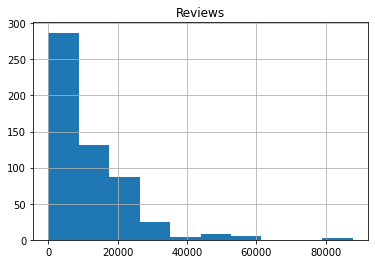

In [11]:
(reviews.toPandas()[["Reviews"]]).astype('float64').hist(column = "Reviews" )

In [ ]:
#Построить матрицу корреляции для столбцов "User Rating", "Reviews" и "Price".

In [12]:

matrix = df.select(df["User Rating"].cast("float"), df.Reviews.cast("float"), df.Price.cast("float"))
matrix.show()

+-----------+-------+-----+
|User Rating|Reviews|Price|
+-----------+-------+-----+
|        4.7|17350.0|  8.0|
|        4.6| 2052.0| 22.0|
|        4.7|18979.0| 15.0|
|        4.7|21424.0|  6.0|
|        4.8| 7665.0| 12.0|
|        4.4|12643.0| 11.0|
|        4.7|19735.0| 30.0|
|        4.7|19699.0| 15.0|
|        4.7| 5983.0|  3.0|
|        4.6|23848.0|  8.0|
|        4.6|23848.0|  8.0|
|        4.6|  460.0|  2.0|
|        4.6| 4149.0| 32.0|
|        4.5| 5153.0|  5.0|
|        4.6| 5013.0| 17.0|
|        4.5| 2313.0|  4.0|
|        4.6| 2925.0|  6.0|
|        4.4| 2951.0|  6.0|
|        4.5| 2426.0|  8.0|
|        4.8| 9198.0| 13.0|
+-----------+-------+-----+
only showing top 20 rows



In [13]:

matrix.toPandas().corr().abs()

,User Rating,Reviews,Price
User Rating,1.000000,0.001729,0.133086
Reviews,0.001729,1.000000,0.109182
Price,0.133086,0.109182,1.000000


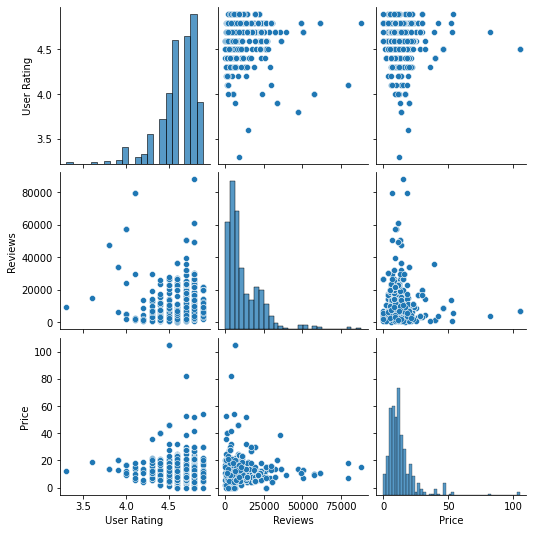

In [14]:
matrix= matrix.toPandas()
sns.pairplot(matrix)

In [ ]:
#Найдите автора с самым высоким рейтингом.

In [15]:
df.createOrReplaceTempView("df")

spark.sql(
    """
      Select 
        Author, avg(`User Rating`) as `Average Rating`
      From df
      Group By Author
      Order by `Average Rating` desc
      Limit 3
    """
).show()

+------------------+--------------+
|            Author|Average Rating|
+------------------+--------------+
|       Chip Gaines|           4.9|
|Lin-Manuel Miranda|           4.9|
|    Nathan W. Pyle|           4.9|
+------------------+--------------+



In [ ]:
#Найдите трех авторов с самым низким рейтингом.

In [16]:

spark.sql(
    """
      Select 
        Author, avg(`User Rating`) as `Average Rating`
      From df
      Group By Author
      Order by `Average Rating`
      Limit 3
    """
).show()

+--------------+--------------+
|        Author|Average Rating|
+--------------+--------------+
|   Donna Tartt|           3.9|
| Gillian Flynn|           4.0|
|Muriel Barbery|           4.0|
+--------------+--------------+



In [ ]:
#Определите какой автор получил наибольшее количество рецензий.

In [18]:

reviews = df.select(df["Reviews"].cast("float"), df["Author"])
reviews.createOrReplaceTempView("df_rev")

spark.sql(
    """
      Select Author, Reviews
      From df_rev
      Order by Reviews desc
      Limit 1
    """
).show()

+-----------+-------+
|     Author|Reviews|
+-----------+-------+
|Delia Owens|87841.0|
+-----------+-------+



In [ ]:
#Определите какой автор написал наибольшее количество книг за весь доступный в данных период.

In [ ]:
spark.sql(
    """
      Select 
        Author, COUNT(*) AS `number of books`
      From df
      Group By Author
      Order by `number of books` desc
      Limit 1
    """
).show()

+-----------+---------------+
|     Author|number of books|
+-----------+---------------+
|Jeff Kinney|             12|
+-----------+---------------+



In [ ]:
#Определите какая книга жанра "Fiction" имеет самый маленький рейтинг.

In [19]:
spark.sql(
    """
      Select 
        Name, `User Rating`, Genre, Author
      From df
      Where Genre = 'Fiction'
      Order by `User Rating`
      Limit 1
    """
).show()

+------------------+-----------+-------+------------+
|              Name|User Rating|  Genre|      Author|
+------------------+-----------+-------+------------+
|The Casual Vacancy|        3.3|Fiction|J.K. Rowling|
+------------------+-----------+-------+------------+



In [ ]:
#Определите какая книга жанра "Non Fiction" имеет самый высокий рейтинг.

In [20]:
spark.sql(
    """
      Select 
        Name, `User Rating`, Genre
      From df
      Where Genre = 'Non Fiction'
      Order by `User Rating` desc
      Limit 1
    """
).show()

+--------------------+-----------+-----------+
|                Name|User Rating|      Genre|
+--------------------+-----------+-----------+
|Hamilton: The Rev...|        4.9|Non Fiction|
+--------------------+-----------+-----------+



In [21]:
#Постройте гистограмму среднего количества рецензий по годам.

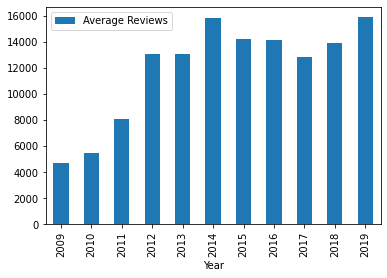

In [ ]:
Avg_rev_by_y = spark.sql(
    """
      Select
        Year as `Year`, avg(`Reviews`) as `Average Reviews`
      From df
      Group by `Year`
      Order by `Year`
    """
)

Avg_rev_by_year = Avg_rev_by_y.select(Avg_rev_by_y["Average Reviews"].cast("float"), Avg_rev_by_y["Year"])

Avg_rev_by_year.toPandas().plot(x="Year", y="Average Reviews", kind="bar")

In [ ]:
#В виде отдельной гистограммы визуализируйте количество книг жанра "Fiction" и "Non Fiction" за весь доступный период

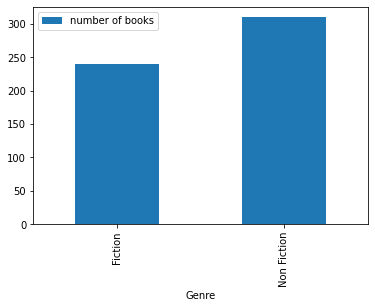

In [ ]:

genre = spark.sql(
    """
      Select
        Genre, COUNT(*) AS `number of books`
      From df
      Group by Genre
    """
)
genre.toPandas().plot(x="Genre", y = "number of books", kind="bar")
